In [21]:
from google.colab import drive
import pandas as pd
import os

drive.flush_and_unmount()
drive.mount('/content/drive', force_remount=True)

file_path="/content/drive/MyDrive"

for root,dirs,files in os.walk(file_path):
  for file in files:
    if file.endswith('.xlsx'):
      file_path=os.path.join(root,file)
      print(file)
      print(file_path)


Mounted at /content/drive
maharashtra.xlsx
/content/drive/MyDrive/maharashtra.xlsx


In [22]:
df=pd.read_excel(file_path)

In [23]:
df

,Timestamp,load
0,2022-04-01 00:00:00.000,308.770400
1,2022-04-01 00:15:00.000,265.276635
2,2022-04-01 00:30:00.000,262.288430
3,2022-04-01 00:45:00.000,258.298874
4,2022-04-01 01:00:00.000,282.151463
...,...,...
45307,2023-07-16 22:44:59.991,391.153800
45308,2023-07-16 22:59:59.991,360.864800
45309,2023-07-16 23:14:59.991,367.917960
45310,2023-07-16 23:29:59.991,358.132640


<Axes: xlabel='Timestamp'>

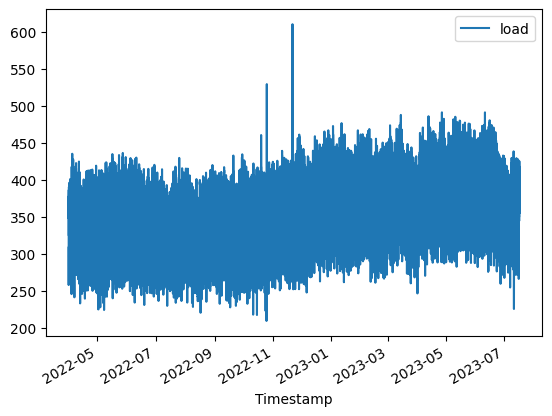

In [25]:
df.plot(x='Timestamp', y='load', kind='line')

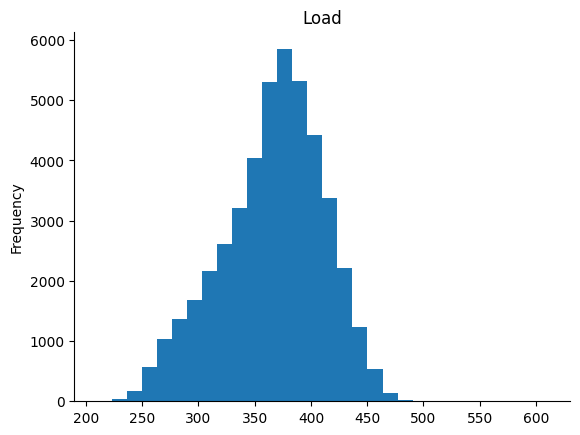

In [26]:
from matplotlib import pyplot as plt
df['load'].plot(kind='hist',bins=30,title='Load')
plt.gca().spines[['top','right',]].set_visible(False)

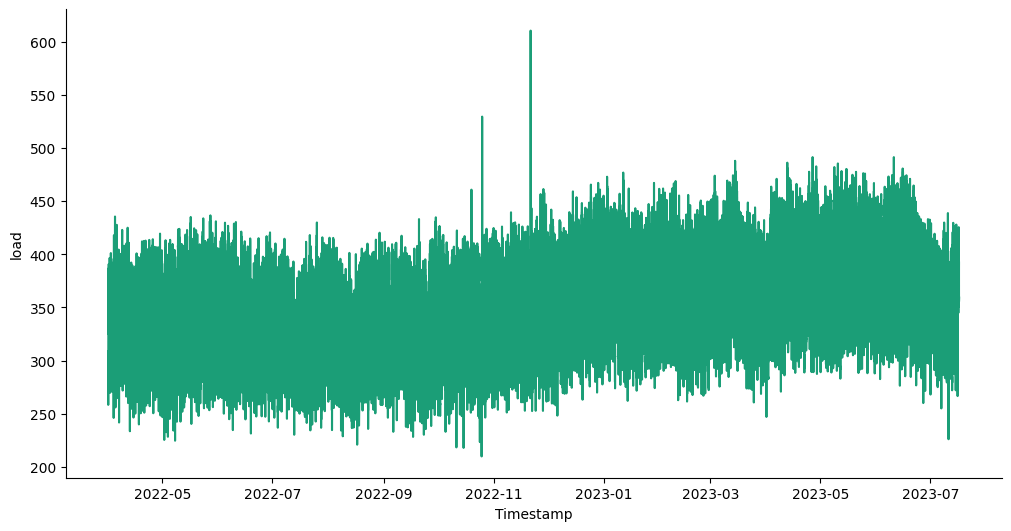

In [27]:
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Timestamp']
  ys = series['load']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Timestamp', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Timestamp')
_ = plt.ylabel('load')

<Axes: xlabel='Timestamp', ylabel='load'>

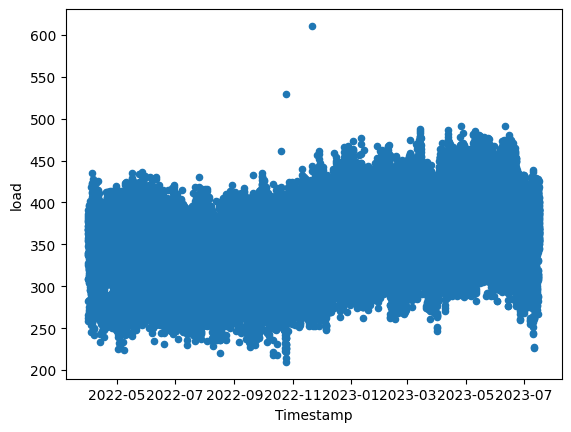

In [28]:
df.plot.scatter(x='Timestamp', y='load')

In [29]:
# Convert the 'timestamp' column to datetime
df['timestamp'] = pd.to_datetime(df['Timestamp'])

# Set the 'timestamp' column as the index
df.set_index('timestamp', inplace=True)

# Display the DataFrame with the 'timestamp' as the index
print(df.head())


                              Timestamp        load
timestamp                                          
2022-04-01 00:00:00 2022-04-01 00:00:00  308.770400
2022-04-01 00:15:00 2022-04-01 00:15:00  265.276635
2022-04-01 00:30:00 2022-04-01 00:30:00  262.288430
2022-04-01 00:45:00 2022-04-01 00:45:00  258.298874
2022-04-01 01:00:00 2022-04-01 01:00:00  282.151463


In [30]:
!python -m pip show statsmodels

Name: statsmodels
Version: 0.14.2
Summary: Statistical computations and models for Python
Home-page: https://www.statsmodels.org/
Author: 
Author-email: 
License: BSD License
Location: /usr/local/lib/python3.10/dist-packages
Requires: numpy, packaging, pandas, patsy, scipy
Required-by: plotnine


In [31]:
!python -m pip install statsmodels

In [32]:
!python -m pip install --upgrade statsmodels

In [33]:
# !pip install statsmodels
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf
from statsmodels.tsa.stattools import adfuller

# Perform the ADF test
result = adfuller(df['load'])

print('ADF Statistic:', result[0])
print('p-value:', result[1])


ADF Statistic: -27.33040587200968
p-value: 0.0


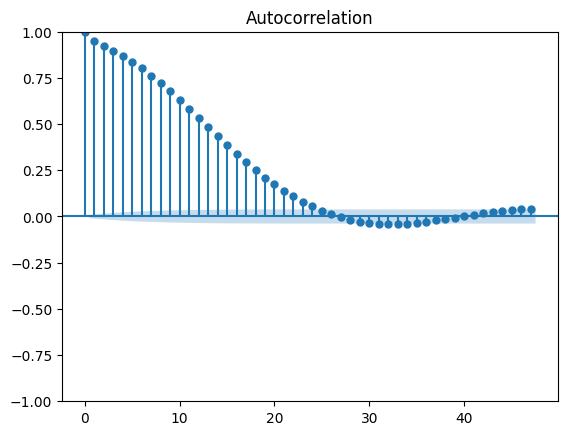

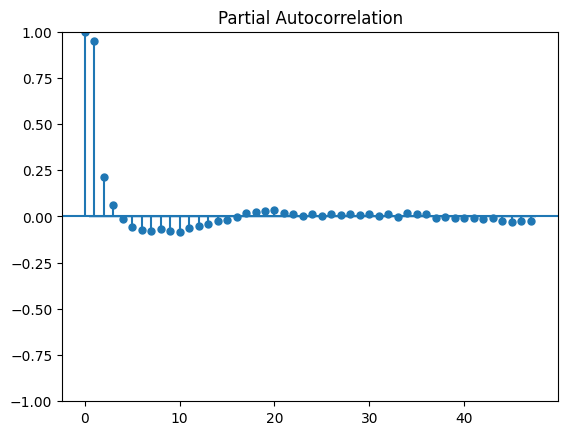

In [34]:
plot_acf(df['load'].dropna())
plot_pacf(df['load'].dropna())
plt.show()

In [35]:
# from statsmodels.tsa.arima.model import ARIMA

# # Define the model
# model = ARIMA(df['load'], order=(2,1,1))  # significant spike at 1 and 2 in the pacf graph , so p=2 , non-stationary so d=1(differencing required)

# # Fit the model
# model_fit = model.fit()

# # Print the model summary
# print(model_fit.summary())

import itertools

import statsmodels.api as sm
# Define the d and q parameters to take any value between 0 and 1
q = d = range(0, 2)
# Define the p parameters to take any value between 0 and 3
p = range(0, 4)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))


Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [36]:
df

,Timestamp,load
timestamp,,
2022-04-01 00:00:00.000,2022-04-01 00:00:00.000,308.770400
2022-04-01 00:15:00.000,2022-04-01 00:15:00.000,265.276635
2022-04-01 00:30:00.000,2022-04-01 00:30:00.000,262.288430
2022-04-01 00:45:00.000,2022-04-01 00:45:00.000,258.298874
2022-04-01 01:00:00.000,2022-04-01 01:00:00.000,282.151463
...,...,...
2023-07-16 22:44:59.991,2023-07-16 22:44:59.991,391.153800
2023-07-16 22:59:59.991,2023-07-16 22:59:59.991,360.864800
2023-07-16 23:14:59.991,2023-07-16 23:14:59.991,367.917960


In [37]:
# train_data = df['2022-04-01':'2022-12-01']
# test_data = df['2023-01-16':'2023-07-16']

In [38]:
# # from statsmodels.tsa.seasonal import seasonal_decompose



# # # Decompose data to check for seasonality (optional)
# # decomposition = seasonal_decompose(df['load'], model='additive')
# # decomposition.plot()
# # plt.show()

# # # Explore alternative models (optional)
# # from statsmodels.tsa.statespace.sarima import SARIMA

# # # Fit ARIMA model (initial values)
# # p, d, q = 2, 1, 1
# # model = ARIMA(df['load'], order=(p, d, q))
# # model_fit = model.fit()

# # # Print model summary
# # print(model_fit.summary())

# # # Explore SARIMA for seasonality (optional)
# # if decomposition.seasonal['seasonal'].std() > 0:  # Check for significant seasonality
# #     # Identify seasonality period (e.g., daily, weekly, monthly) based on your data
# #     seasonality_period = 7  # Adjust as needed
# #     model = SARIMA(df['load'], order=(p, d, q), seasonal_order=(1, 0, 1, seasonality_period))
# #     model_fit = model.fit()
# #     print(model_fit.summary())

# # # Forecast
# # n_periods = 10
# # forecast = model_fit.forecast(steps=n_periods)
# # # ... (rest of the code for plotting the forecast remains the same)





# # warnings.filterwarnings("ignore") # specify to ignore warning messages

# AIC = []
# SARIMAX_model = []
# for param in pdq:
#     for param_seasonal in seasonal_pdq:
#         try:
#             mod = sm.tsa.statespace.SARIMAX(train_data,
#                                             # order=param,
#                                             # seasonal_order=param_seasonal,
#                                             enforce_stationarity=False,
#                                             enforce_invertibility=False)

#             results = mod.fit()

#             print('SARIMAX{}x{} - AIC:{}'.format(param, param_seasonal, results.aic), end='\r')
#             AIC.append(results.aic)
#             SARIMAX_model.append([param, param_seasonal])
#         except:
#             continue




In [39]:
# train_data_np = train_data.values

# print(train_data_np.shape)

(23521, 2)


In [68]:

# # # Create a date range for the forecast
# # # Extend historical data index to cover forecast period
# # df_extended = df.resample('D').fillna(method='ffill')  # Extend with last valid value

# # from datetime import timedelta

# # last_date = df.index[-1]
# # forecast_dates = [last_date + timedelta(days=x) for x in range(1, n_periods + 1)]

# # # Create a DataFrame for the forecast
# # forecast_df = pd.DataFrame(forecast, index=forecast_dates, columns=['Forecast'])

# # # Plot the forecast
# # plt.figure(figsize=(12, 6))
# # # plt.plot(df['load'], label='Historical Data')
# # plt.plot(forecast_df.index, forecast_df['Forecast'], label='Forecast', color='red')
# # plt.title('Load Forecast')
# # plt.xlabel('Timestamp')
# # plt.ylabel('Load')
# # plt.legend()
# # plt.show()

# train_data_np_1=train_data_np[:,0]

# mod = sm.tsa.statespace.SARIMAX(train_data_np_1,
#                                 # order=SARIMAX_model[AIC.index(min(AIC))][0],
#                                 # seasonal_order=SARIMAX_model[AIC.index(min(AIC))][1],
#                                 enforce_stationarity=False,
#                                 enforce_invertibility=False)

# results = mod.fit()

In [43]:
df.head()

,Timestamp,load
timestamp,,
2022-04-01,2022-04-01,308.770400
2022-04-02,2022-04-02,305.576039
2022-04-03,2022-04-03,295.939499
2022-04-04,2022-04-04,292.438428
2022-04-05,2022-04-05,309.931472


In [56]:
# Ensure the 'load' column is numeric
df['load'] = pd.to_numeric(df['load'], errors='coerce')

# Check for and handle NaN and infinite values
df['load'].replace([np.inf, -np.inf], np.nan, inplace=True)

# Calculate the mean of the 'load' column, ignoring NaNs
mean_load = df['load'].mean()
df['load'].fillna(mean_load, inplace=True)

# Infer and set the frequency of the date index
df = df.asfreq(pd.infer_freq(df.index))
print(f"Data after setting frequency:\n{df.head()}")

Data after setting frequency:
                  load
Timestamp             
2022-04-01  308.770400
2022-04-02  305.576039
2022-04-03  295.939499
2022-04-04  292.438428
2022-04-05  309.931472


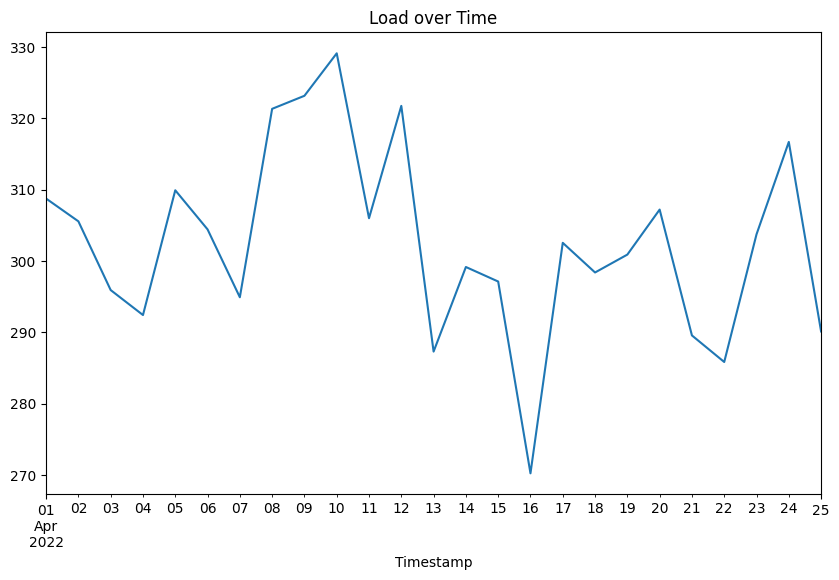

In [57]:

# Plot the time series
df['load'].plot(figsize=(10, 6))
plt.title('Load over Time')
plt.show()

In [58]:
result = adfuller(df['load'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -3.739091135282926
p-value: 0.003595718978364094


In [59]:
if result[1] > 0.05:
    df['load_diff'] = df['load'].diff().dropna()
    result = adfuller(df['load_diff'].dropna())
    print('ADF Statistic after differencing:', result[0])
    print('p-value after differencing:', result[1])

    # Plot ACF and PACF for differenced data
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    plot_acf(df['load_diff'].dropna(), ax=ax[0])
    plot_pacf(df['load_diff'].dropna(), ax=ax[1])
    plt.show()


In [78]:
from statsmodels.tsa.arima.model import ARIMA


# p, d, q = 2, 1, 1  # Initial values based on our analysis
p=d=q=range(0,4)
pdq=list(itertools.product(p,d,q))

best_aic = float("-inf")
best_order = None

for param in pdq:
    try:
        model = ARIMA(df['load'], order=param)
        results = model.fit()
        if results.aic > best_aic:
            best_aic = results.aic
            best_order = param
        print(f"ARIMA{param} - AIC:{results.aic}")
    except:
        continue

print(f"Best ARIMA{best_order} - AIC:{best_aic}")



ARIMA(0, 0, 0) - AIC:203.85299395888114
ARIMA(0, 0, 1) - AIC:204.9875917597132
ARIMA(0, 0, 2) - AIC:206.74829537737438
ARIMA(0, 0, 3) - AIC:207.65196678579255
ARIMA(0, 1, 0) - AIC:205.42756695486935
ARIMA(0, 1, 1) - AIC:199.3527382197952
ARIMA(0, 1, 2) - AIC:200.75628306352837
ARIMA(0, 1, 3) - AIC:202.4838421622452
ARIMA(0, 2, 0) - AIC:221.17425552575443
ARIMA(0, 2, 1) - AIC:203.05699264969294


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(0, 2, 2) - AIC:199.3594893673108
ARIMA(0, 2, 3) - AIC:201.34822793247383
ARIMA(0, 3, 0) - AIC:237.62631513377403
ARIMA(0, 3, 1) - AIC:217.72962255788312


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(0, 3, 2) - AIC:203.64965470664487


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(0, 3, 3) - AIC:202.376753850708
ARIMA(1, 0, 0) - AIC:204.82084345332453
ARIMA(1, 0, 1) - AIC:206.58159638173385
ARIMA(1, 0, 2) - AIC:208.41887494051542
ARIMA(1, 0, 3) - AIC:209.48230588166572
ARIMA(1, 1, 0) - AIC:202.20358707826549
ARIMA(1, 1, 1) - AIC:200.54898037237984
ARIMA(1, 1, 2) - AIC:202.60319676405067


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(1, 1, 3) - AIC:204.4303872803219
ARIMA(1, 2, 0) - AIC:212.12243978341354
ARIMA(1, 2, 1) - AIC:200.78196031466408


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 2, 2) - AIC:201.12923664608442
ARIMA(1, 2, 3) - AIC:202.91399374013335
ARIMA(1, 3, 0) - AIC:224.46363357477577


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(1, 3, 1) - AIC:210.12727375345276


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(1, 3, 2) - AIC:202.75864375123277


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


ARIMA(1, 3, 3) - AIC:204.28425755875253
ARIMA(2, 0, 0) - AIC:206.5616788938608
ARIMA(2, 0, 1) - AIC:208.01233304007135


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 2) - AIC:208.41610741753524
ARIMA(2, 0, 3) - AIC:211.444791826617
ARIMA(2, 1, 0) - AIC:201.97633346229654
ARIMA(2, 1, 1) - AIC:203.97264694285684
ARIMA(2, 1, 2) - AIC:204.2893020260556
ARIMA(2, 1, 3) - AIC:205.70951625061076
ARIMA(2, 2, 0) - AIC:205.71359236022153
ARIMA(2, 2, 1) - AIC:201.15283764725854
ARIMA(2, 2, 2) - AIC:203.16795770414382


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 3) - AIC:204.13435709544322
ARIMA(2, 3, 0) - AIC:214.3849729121112
ARIMA(2, 3, 1) - AIC:204.99932959871043


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 3, 2) - AIC:203.92904908446937
ARIMA(2, 3, 3) - AIC:205.51515035534135
ARIMA(3, 0, 0) - AIC:208.34455143768503
ARIMA(3, 0, 1) - AIC:209.70757834474892


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(3, 0, 2) - AIC:209.45115398631526


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3, 0, 3) - AIC:211.6434791838326
ARIMA(3, 1, 0) - AIC:203.9752782111051
ARIMA(3, 1, 1) - AIC:203.68392288006174


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(3, 1, 2) - AIC:205.12801015120485


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3, 1, 3) - AIC:207.1254504134326
ARIMA(3, 2, 0) - AIC:205.88180637137913
ARIMA(3, 2, 1) - AIC:203.12081689449417


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels

ARIMA(3, 2, 2) - AIC:204.79139589510018


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3, 2, 3) - AIC:204.8882338179322
ARIMA(3, 3, 0) - AIC:211.70849377413225
ARIMA(3, 3, 1) - AIC:205.7185532691409


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


ARIMA(3, 3, 2) - AIC:205.66951824229056
ARIMA(3, 3, 3) - AIC:209.8368472451958
Best ARIMA(0, 3, 0) - AIC:237.62631513377403


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [84]:
p,d,q=3,3,2
model = ARIMA(df['load'], order=(p, d, q))
model_fit = model.fit()

print(model_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                   load   No. Observations:                   25
Model:                 ARIMA(3, 3, 2)   Log Likelihood                 -96.835
Date:                Wed, 29 May 2024   AIC                            205.670
Time:                        11:12:50   BIC                            212.216
Sample:                    04-01-2022   HQIC                           207.212
                         - 04-25-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4452      0.728     -0.612      0.541      -1.871       0.981
ar.L2         -0.1210      0.602     -0.201      0.841      -1.300       1.058
ar.L3          0.1269      0.469      0.271      0.7

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [85]:
n_periods = 25
forecast = model_fit.forecast(steps=n_periods)
forecast

2022-04-26    302.019479
2022-04-27    301.028407
2022-04-28    296.185492
2022-04-29    299.585863
2022-04-30    298.237379
2022-05-01    297.605279
2022-05-02    298.364242
2022-05-03    297.903321
2022-05-04    297.996928
2022-05-05    298.256767
2022-05-06    298.309529
2022-05-07    298.593632
2022-05-08    298.909793
2022-05-09    299.246282
2022-05-10    299.688091
2022-05-11    300.173506
2022-05-12    300.718226
2022-05-13    301.333520
2022-05-14    302.004638
2022-05-15    302.738774
2022-05-16    303.535942
2022-05-17    304.393392
2022-05-18    305.313260
2022-05-19    306.294930
2022-05-20    307.338068
Freq: D, Name: predicted_mean, dtype: float64

In [86]:
from datetime import timedelta

last_date = df.index[-1]
forecast_dates = pd.date_range(start=last_date + timedelta(days=1), periods=n_periods, freq=df.index.freq)
forecast_dates

DatetimeIndex(['2022-04-26', '2022-04-27', '2022-04-28', '2022-04-29',
               '2022-04-30', '2022-05-01', '2022-05-02', '2022-05-03',
               '2022-05-04', '2022-05-05', '2022-05-06', '2022-05-07',
               '2022-05-08', '2022-05-09', '2022-05-10', '2022-05-11',
               '2022-05-12', '2022-05-13', '2022-05-14', '2022-05-15',
               '2022-05-16', '2022-05-17', '2022-05-18', '2022-05-19',
               '2022-05-20'],
              dtype='datetime64[ns]', freq='D')

In [87]:
forecast_df = pd.DataFrame(data=forecast.values, index=forecast_dates, columns=['Forecast'])
forecast_df

,Forecast
2022-04-26,302.019479
2022-04-27,301.028407
2022-04-28,296.185492
2022-04-29,299.585863
2022-04-30,298.237379
2022-05-01,297.605279
2022-05-02,298.364242
2022-05-03,297.903321
2022-05-04,297.996928
2022-05-05,298.256767


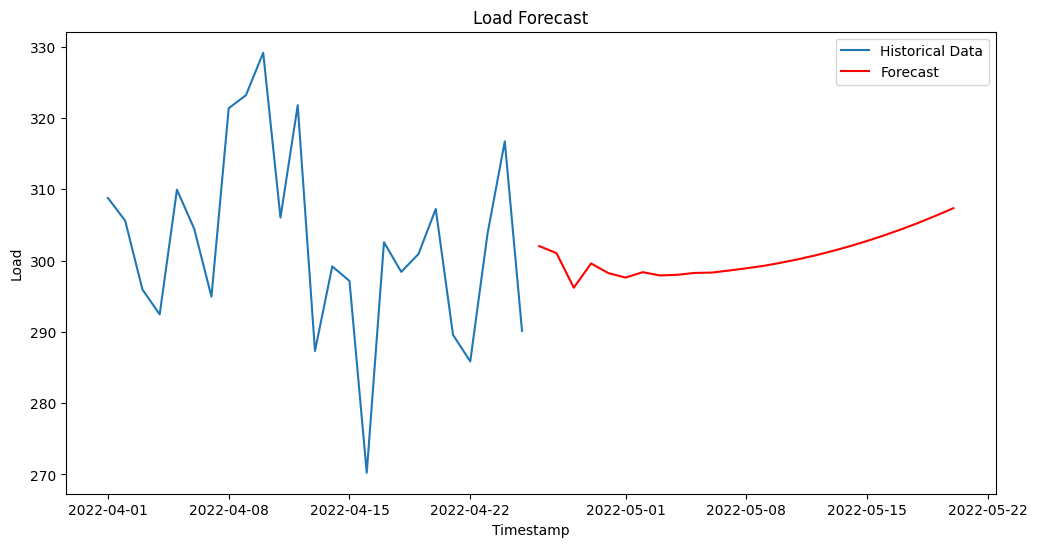

In [88]:

plt.figure(figsize=(12, 6))
plt.plot(df['load'], label='Historical Data')
plt.plot(forecast_df.index, forecast_df['Forecast'], label='Forecast', color='red')
plt.title('Load Forecast')
plt.xlabel('Timestamp')
plt.ylabel('Load')
plt.legend()
plt.show()
